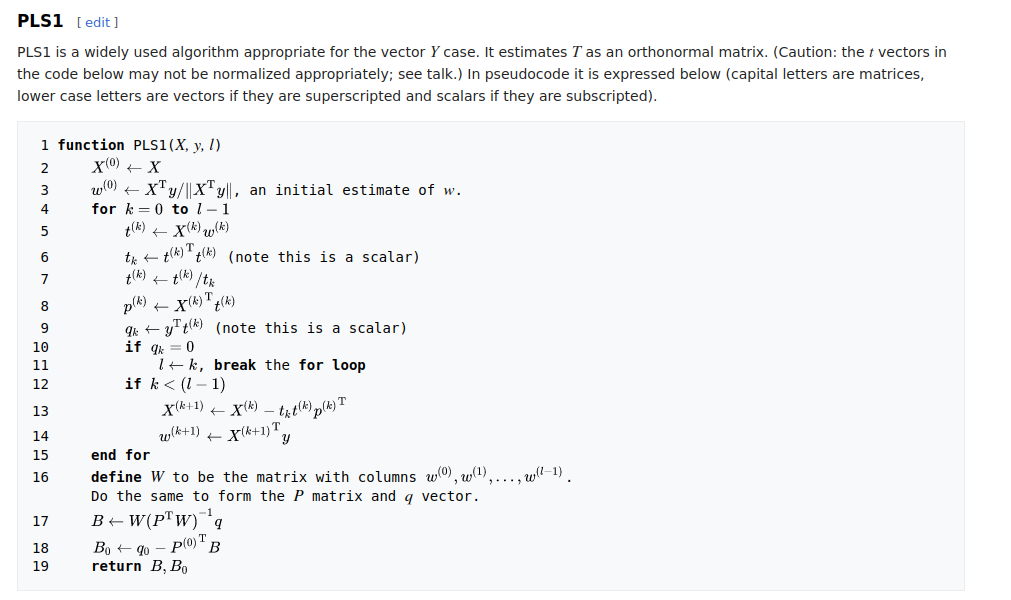

# PLS1

In [1]:
%cd ..

/home/nyanmaruk/Code/Uni/Numerical_methods/NumericalAlgorithms


Loop 0
Xk [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
wk [0.50257071 0.57436653 0.64616234]
Xk then [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
Loop 1
Xk [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
wk [68.35880663 77.87719726 87.39558789]
Xk then [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
Loop 2
Xk [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
wk [68.35870748 77.87706403 87.39542058]
Xk then [[ 0.50924777  1.36523243  2.2212171 ]
 [ 3.79888037  4.73986055  5.68084074]
 [ 6.87352316  7.83640776  8.79929236]
 [ 9.90775759 10.88068849 11.853

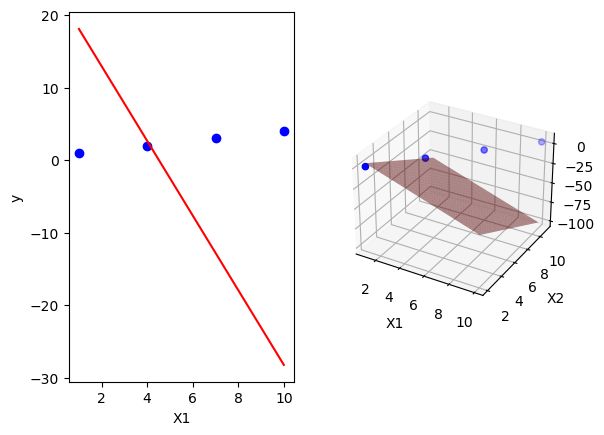

Loop 0
Xk [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
wk [0.50257071 0.57436653 0.64616234]
Xk then [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
Loop 1
Xk [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
wk [68.35880663 77.87719726 87.39558789]
Xk then [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
Loop 2
Xk [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
wk [68.35870748 77.87706403 87.39542058]
Xk then [[ 0.50924777  1.36523243  2.2212171 ]
 [ 3.79888037  4.73986055  5.68084074]
 [ 6.87352316  7.83640776  8.79929236]
 [ 9.90775759 10.88068849 11.853

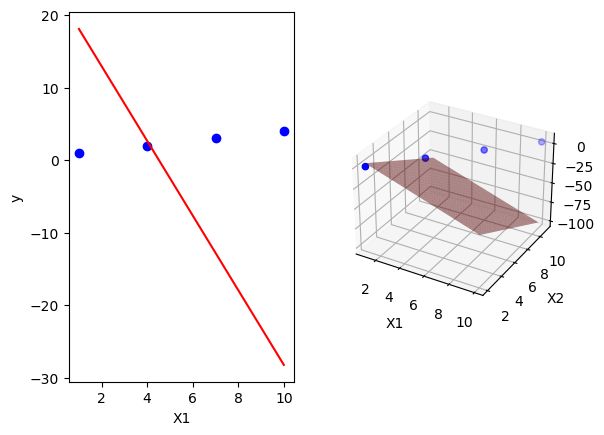

Loop 0
Xk [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
wk [0.50257071 0.57436653 0.64616234]
Xk then [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
Loop 1
Xk [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
wk [68.35880663 77.87719726 87.39558789]
Xk then [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
Loop 2
Xk [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
wk [68.35870748 77.87706403 87.39542058]
Xk then [[ 0.50924777  1.36523243  2.2212171 ]
 [ 3.79888037  4.73986055  5.68084074]
 [ 6.87352316  7.83640776  8.79929236]
 [ 9.90775759 10.88068849 11.853

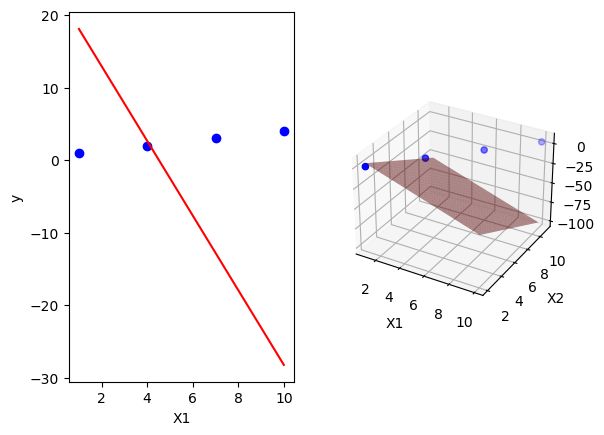

Loop 0
Xk [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
wk [0.50257071 0.57436653 0.64616234]
Xk then [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
Loop 1
Xk [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
wk [68.35880663 77.87719726 87.39558789]
Xk then [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
Loop 2
Xk [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
wk [68.35870748 77.87706403 87.39542058]
Xk then [[ 0.50924777  1.36523243  2.2212171 ]
 [ 3.79888037  4.73986055  5.68084074]
 [ 6.87352316  7.83640776  8.79929236]
 [ 9.90775759 10.88068849 11.853

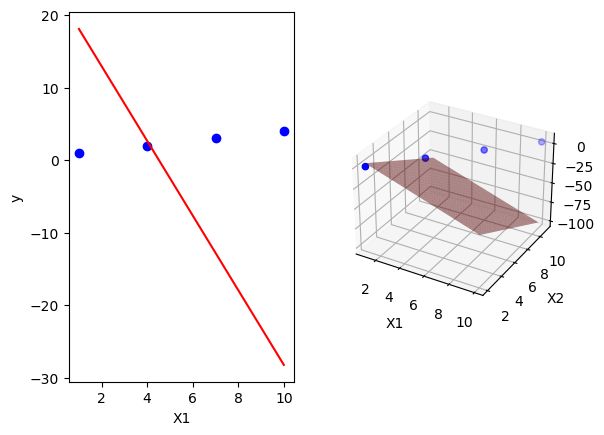

Loop 0
Xk [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
wk [0.50257071 0.57436653 0.64616234]
Xk then [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
Loop 1
Xk [[ 0.50932222  1.36533248  2.22134273]
 [ 3.79890255  4.73989036  5.68087817]
 [ 6.87353666  7.8364259   8.79931514]
 [ 9.90776734 10.88070159 11.85363585]]
wk [68.35880663 77.87719726 87.39558789]
Xk then [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
Loop 2
Xk [[ 0.509285    1.36528246  2.22127992]
 [ 3.79889146  4.73987546  5.68085945]
 [ 6.87352991  7.83641683  8.79930375]
 [ 9.90776246 10.88069504 11.85362763]]
wk [68.35870748 77.87706403 87.39542058]
Xk then [[ 0.50924777  1.36523243  2.2212171 ]
 [ 3.79888037  4.73986055  5.68084074]
 [ 6.87352316  7.83640776  8.79929236]
 [ 9.90775759 10.88068849 11.853

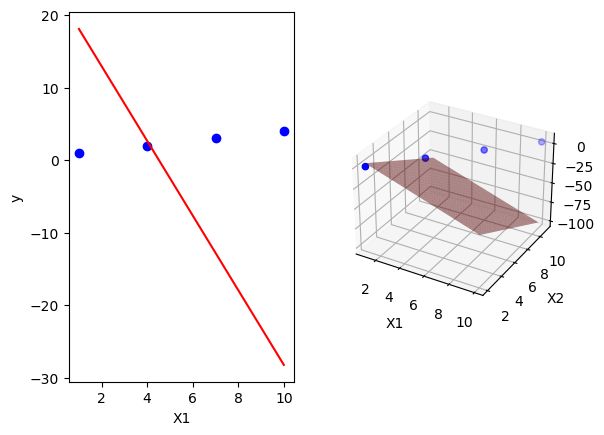

In [87]:
import numpy as np
from numpy.linalg import LinAlgError

from utils import *

class PLS1Alg():
    def __init__(self,X,y,l):
        self.X = X
        self.y = y
        if l <= 26:
            self.l = l  
        else:
            raise ValueError("l must be less than 26")
        self.B = None
        self.B0 = None
    
    def PLS1(self):
        try:
            n, m = self.X.shape
            W = np.zeros((m, self.l))
            P = np.zeros((m, self.l))
            q = np.zeros(self.l)
            B = np.zeros(self.l)
            Xk = self.X.copy()
            wk = Xk.T @ self.y / np.linalg.norm(Xk.T @ self.y)
            for k in range(self.l):
                # print(self.l)
                # print(k)
                print(f"Loop {k}")
                print("Xk", Xk)
                print("wk", wk)
                print("=====================================================")
                assert (wk.reshape(-1,1)).shape == (m, 1)
                tk = Xk @ wk
                tk_norm = (tk.T * tk)
                tk = (tk/tk_norm).reshape(-1, 1)
                assert tk.shape == (n, 1)
                pk = Xk.T @ tk
                qk = self.y.T @ tk
                # print("qk", qk)
                if np.any(qk) == 0:
                    self.l = k
                    break
                W[:, k] = wk
                P[:, k] = pk.reshape(-1)
                q[k] = qk
                if k < (self.l - 1):
                    if self.l == 1:
                        Xk = Xk - tk_norm*tk.reshape(-1, 1) @ (pk.reshape(1, -1).T)
                    else:
                        Xk = Xk - tk @ pk.T
                    print("Xk then", Xk)
                    # print("Xk.T @ y", Xk.T @ self.y)
                    wk = Xk.T @ self.y 
                    # print("wk then", wk)
                    print("=====================================================")
                    print("=====================================================")

            P = np.column_stack([P[:, i] for i in range(self.l)])
            W = np.column_stack([W[:, i] for i in range(self.l)])
            q = q.reshape(-1, 1)
            B = W @ np.linalg.inv(P.T@W) @ q
            B0 = q[0] - P[:, 0].T @ B

            return B, B0
        
        except LinAlgError as e:
            print(f"Error: {e}")
            return None
        
    def fit(self):
        self.B, self.B0 = self.PLS1()
        return self.B, self.B0
    
    def predict(self, X):
        return X @ self.B + self.B0
    


X=np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
y=np.array([1,2,3,4])

# B, B0 = PLS1Alg(X, y, 26).PLS1()
# print("B",B)
# print("B0",B0)
# plot_2and_3D(X, y, B, B0)
loops = 5
for i in range(loops):
    B, B0 = PLS1Alg(X, y, loops).PLS1()
    if B is not None:
        plot_2and_3D(X, y, B, B0)
    else:
        print("B is None")
        continue

Loop 0
Xk [[0.06095677 0.90200398 0.33408938 0.0828089  0.56957771 0.48894393]
 [0.23337996 0.18264023 0.34425841 0.25194222 0.8975267  0.73074701]
 [0.82023746 0.41673061 0.01507142 0.84855677 0.21954457 0.89497516]
 [0.35478618 0.1115255  0.86553558 0.07439001 0.51460507 0.03993521]
 [0.3357006  0.25854343 0.55180144 0.47435285 0.99466905 0.63560945]]
wk [0.35089947 0.34411788 0.35701666 0.32489088 0.52246867 0.50245792]
B [[0.19466601]
 [0.19090383]
 [0.1980596 ]
 [0.1802374 ]
 [0.28984623]
 [0.27874501]]
B0 [0.]


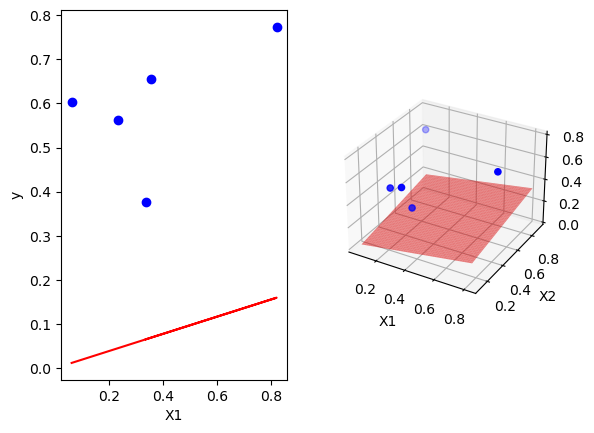

In [88]:
num_samples = 5
random_data_X = np.random.rand(num_samples, 6)
random_data_y = np.random.rand(num_samples)

B, B0 = PLS1Alg(random_data_X, random_data_y, 1).PLS1()
print("B",B)
print("B0",B0)

plot_2and_3D(random_data_X, random_data_y, B, B0)